# Import

In [2]:
# Standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno

# Modeling imports
from sklearn.linear_model import LinearRegression, RANSACRegressor, HuberRegressor,TheilSenRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [3]:
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

# Data cleaning and formating

In [5]:
# review DataFrame shape
train_df.shape

(14271, 23)

In [6]:
# review data type
train_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                        int64
dtype: object

In [7]:
# review number null records
train_df.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                3762
bedrooms                     43
baths                        35
floor_area                    0
floor_level                6178
land_area                  9354
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    7043
nearby_bus_stops           8262
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64

In [8]:
train_df.describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
count,1.427100e+04,10509.000000,14228.000000,14236.000000,14271.000000,8093.000000,4917.000000,14271.000000,14271.000000,14271.000000,6009.000000,13885.000000,14271.000000,14271.000000,1.427100e+04
mean,1.062614e+07,712.655438,1.880728,1.618292,79.867283,11.322995,242.963596,13.762814,100.565017,0.956415,14.049426,9.002161,10.447060,1422.737440,4.044124e+06
std,8.030103e+05,554.558340,1.092817,0.872875,69.701181,9.064835,3083.223006,0.092787,0.089575,1.085255,6.496828,5.348001,6.950903,917.737592,2.179909e+06
min,1.025114e+06,1.000000,1.000000,0.000000,1.000000,1.000000,16.000000,13.517062,100.273931,0.000000,1.000000,1.000000,1.000000,0.000000,4.800000e+05
25%,1.064588e+07,318.000000,1.000000,1.000000,32.000000,4.000000,80.000000,13.705177,100.512628,0.000000,8.000000,5.000000,4.000000,0.000000,2.250000e+06
50%,1.086984e+07,554.000000,1.000000,1.000000,47.000000,8.000000,116.000000,13.753742,100.569721,1.000000,17.000000,8.000000,9.000000,2013.000000,3.500000e+06
75%,1.097710e+07,945.000000,3.000000,2.000000,112.000000,17.000000,212.000000,13.837514,100.608786,2.000000,20.000000,13.000000,19.000000,2017.000000,5.500000e+06
max,1.104790e+07,4000.000000,10.000000,9.000000,766.000000,55.000000,137664.000000,14.022246,100.905485,3.000000,20.000000,20.000000,20.000000,2023.000000,9.999000e+06


In [9]:
train_df['property_type'].unique()

array(['Condo', 'Detached House', 'Townhouse'], dtype=object)

### Suddistrict

In [11]:
# review record with null subdistrict
train_df[train_df['subdistrict'].isnull()][['province','district','subdistrict','address']].head(20)

,province,district,subdistrict,address
2474,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
2933,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
3082,Bangkok,Chatuchak,None,92 ซอยพหลโยธิน 32 (ถนนเสนานิคม 1)
5174,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...
6428,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...
8084,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
8229,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
8238,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
9816,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
10528,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...


In [12]:
# derive null subdistrict from address
train_df.iloc[2474,3] = 'Thung Maha Mek'
train_df.iloc[2933,3] = 'Thung Maha Mek'
train_df.iloc[3082,3] = 'Chan Kaen'
train_df.iloc[5174,3] = 'Bang Chak'
train_df.iloc[6428,3] = 'Bang Chak'
train_df.iloc[8084,3] = 'Thung Maha Mek'
train_df.iloc[8229,3] = 'Thung Maha Mek'
train_df.iloc[8238,3] = 'Thung Maha Mek'
train_df.iloc[9816,3] = 'Thung Maha Mek'
train_df.iloc[10528,3] = 'Bang Chak'
train_df.iloc[11749,3] = 'Thung Maha Mek'

### Condo

In [14]:
train_df.groupby('property_type')['total_units'].count()

property_type
Condo             9033
Detached House     748
Townhouse          728
Name: total_units, dtype: int64

In [15]:
# review property_type Condo with total_units is null
train_df[(train_df['property_type'] == 'Condo') & (train_df['total_units'].isnull())]['id'].count()

173

In [16]:
# drop rows of Condo with total_units is null since there are only 173 Condo 
train_df = train_df[(train_df['property_type'] != 'Condo') | (~train_df['total_units'].isnull())]

In [17]:
train_df[train_df['property_type'] == 'Condo'].describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
count,9.033000e+03,9033.000000,9014.000000,9016.000000,9033.000000,7221.000000,0.0,9033.000000,9033.000000,9033.000000,3141.000000,8989.000000,9033.000000,9033.000000,9.033000e+03
mean,1.059198e+07,770.785232,1.183492,1.107143,39.143695,12.378064,NaN,13.755464,100.561714,1.430090,17.062719,10.763155,13.313074,2014.587291,3.930381e+06
std,8.443138e+05,564.597971,0.404197,0.325050,15.506704,8.966357,NaN,0.068599,0.055462,1.063324,4.977038,5.251303,6.472027,4.242633,2.194383e+06
min,1.422670e+06,1.000000,1.000000,0.000000,20.000000,1.000000,NaN,13.584939,100.383067,0.000000,1.000000,1.000000,1.000000,1992.000000,6.900000e+05
25%,1.061879e+07,373.000000,1.000000,1.000000,29.000000,5.000000,NaN,13.712022,100.531092,0.000000,16.000000,6.000000,7.000000,2012.000000,2.060000e+06
50%,1.086287e+07,627.000000,1.000000,1.000000,35.000000,10.000000,NaN,13.744901,100.567086,2.000000,20.000000,10.000000,14.000000,2015.000000,3.400000e+06
75%,1.097203e+07,1002.000000,1.000000,1.000000,46.000000,18.000000,NaN,13.803459,100.594754,2.000000,20.000000,15.000000,20.000000,2018.000000,5.499000e+06
max,1.104789e+07,4000.000000,8.000000,8.000000,450.000000,55.000000,NaN,13.929053,100.848418,3.000000,20.000000,20.000000,20.000000,2023.000000,9.999000e+06


#### fixing floor level

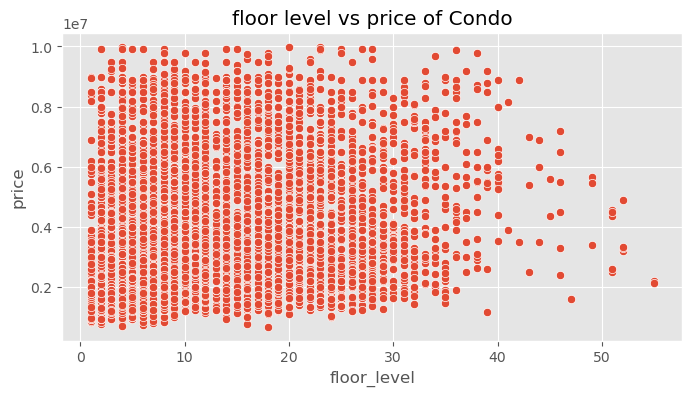

In [19]:
# Room with too many floor level
# Plot boxplot for floor_level vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='floor_level', y='price', data=train_df[(train_df['property_type'] == 'Condo')])
plt.title('floor level vs price of Condo');

#### fixing floor area

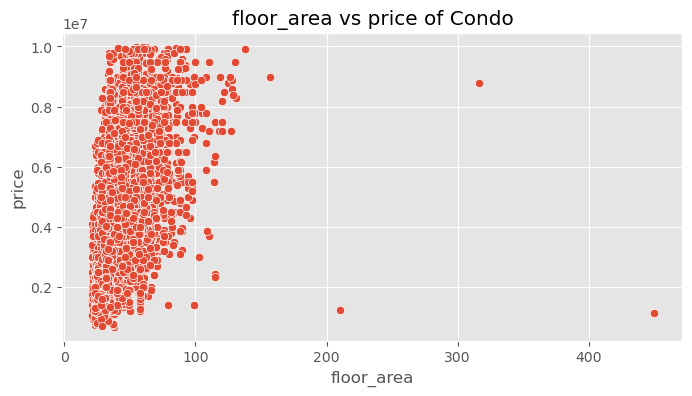

In [21]:
# Room with too large floor area
# Plot boxplot for floor_area vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='floor_area', y='price', data=train_df[(train_df['property_type'] == 'Condo')])
plt.title('floor_area vs price of Condo');

count      9033.000000
mean     100309.894625
std       46532.907140
min        2555.555556
25%       63636.363636
50%       90312.500000
75%      128301.886792
max      290869.565217
Name: price_sqm, dtype: float64

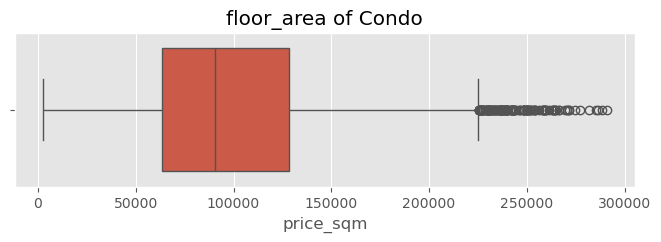

In [22]:
# Plot boxplot for floor_area vs price
train_df['price_sqm'] = train_df[train_df['property_type'] == 'Condo']['price'] / train_df[train_df['property_type'] == 'Condo']['floor_area']
plt.figure(figsize=(8,2))
sns.boxplot(x='price_sqm', data=train_df[(train_df['property_type'] == 'Condo')])
plt.title('floor_area of Condo');
train_df['price_sqm'].describe()

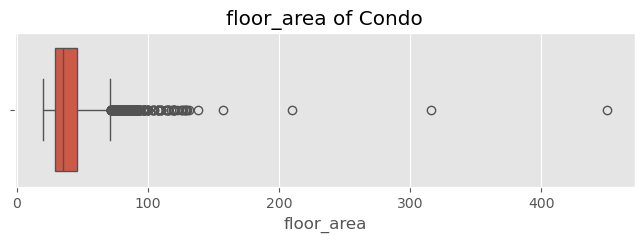

In [23]:
# Plot boxplot for floor_area vs bedrooms
plt.figure(figsize=(8,2))
sns.boxplot(x='floor_area', data=train_df[(train_df['property_type'] == 'Condo')])
plt.title('floor_area of Condo');

In [24]:
train_df[(train_df['property_type'] == 'Condo') & (train_df['floor_area']>150)]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
2887,10924434,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,450,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",1150000,2555.555556
3498,10732863,Bangkok,Bang Khen,Anusawari,144 Phahonyothin Road,Condo,563.0,3.0,2.0,316,...,3,"[[N18 Phahon Yothin 59 BTS, 210], [N19 Sai Yud...",20.0,9.0,5,2019,October,"[Covered car park, CCTV, Fitness corner, 24 ho...",8800000,27848.101266
11841,10894468,Bangkok,Bueng Kum,Khlong Kum,301 Seri Thai Road,Condo,691.0,1.0,1.0,210,...,0,None,20.0,4.0,10,2012,January,"[Fitness corner, Launderette, Mini-Mart, Sauna...",1230000,5857.142857
13118,11007954,Bangkok,Chatuchak,Chan Kasem,Soi Ladprao 35,Condo,194.0,5.0,2.0,157,...,2,"[[BL15 Lat Phrao MRT, 900], [BL16 Ratchadaphis...",NaN,8.0,2,1993,None,"[Car Park, CCTV, 24 hours security]",9000000,57324.840764


In [25]:
# find average floor_area for this address
train_df[(train_df['address'] == 'Soi Ladprao 35')]
9000000 / 157

57324.84076433121

In [26]:
# find average floor_area for this address
train_df[(train_df['address'] == '144 Phahonyothin Road') & (train_df['floor_area'] != 316)]['floor_area'].mean().round()

34.0

In [27]:
# find average floor_area for this address
train_df[(train_df['address'] == 'Soi Ramindhra 78, Nawamin Road - Ramintra Road') & (train_df['floor_area'] != 450)]['floor_area'].mean().round()

26.0

In [28]:
# set average floor_area for this address
train_df.loc[2887, 'floor_area'] = 26

#### fixing bedrooms and baths

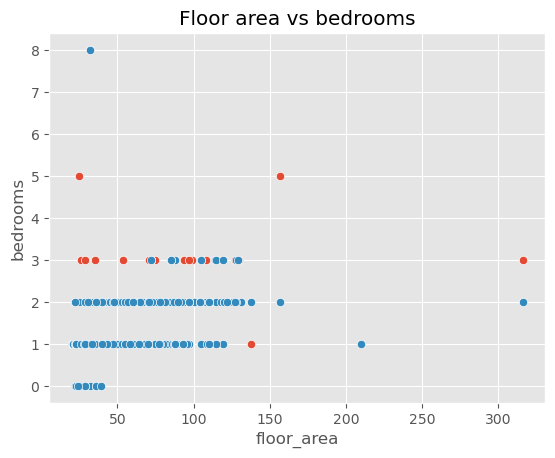

In [30]:
# Plot scatterplot for floor_area vs bedrooms
sns.scatterplot(y='bedrooms', x='floor_area', data=train_df[(train_df['property_type'] == 'Condo')])
sns.scatterplot(y='baths', x='floor_area', data=train_df[(train_df['property_type'] == 'Condo')])
plt.title('Floor area vs bedrooms');

In [31]:
# room area require by low at least 8 sq.m., small than that is invalid
train_df[(train_df['property_type'] == 'Condo') & ((train_df['floor_area'] / train_df['bedrooms'] < 8) | (train_df['floor_area'] / train_df['baths'] < 2.5))]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
8008,10598898,Nonthaburi,Mueang Nonthaburi,Bang Khen,"117 Soi Sombatthep, Prachachuen Road",Condo,206.0,8.0,8.0,32,...,0,None,20.0,15.0,20,2015,November,"[Covered car park, CCTV, Fitness corner, 24 ho...",2100000,65625.0
11052,10915265,Bangkok,Khlong Toei,Phra Khanong,"55 Soi Sukhumvit 36, Sukhumvit Road",Condo,496.0,5.0,1.0,25,...,2,"[[E6 Thong Lo BTS, 290], [E7 Ekkamai BTS, 930]]",NaN,15.0,20,2016,December,"[Covered car park, Community Garden, CCTV, Fit...",3990000,159600.0


In [32]:
# room with 8 bedrooms, impute from other rooms with same address
train_df[(train_df['address'] == '117 Soi Sombatthep, Prachachuen Road') & (train_df['bedrooms'] != 8)][['bedrooms','baths']].mean()

bedrooms    1.0
baths       1.0
dtype: float64

In [33]:
# replace room to 1
train_df.loc[8008,'bedrooms'] = 1
train_df.loc[8008,'baths'] = 1

In [34]:
# room with 5 bedrooms, impute from other rooms with same address
train_df[(train_df['address'] == '55 Soi Sukhumvit 36, Sukhumvit Road') & (train_df['bedrooms'] != 5)][['bedrooms','baths']].mean()

bedrooms    1.0
baths       1.0
dtype: float64

In [35]:
# replace room to 1
train_df.loc[11052,'bedrooms'] = 1
train_df.loc[11052,'baths'] = 1

In [36]:
# room with 8 rooms
train_df[(train_df['address'] == 'Soi Ladprao 35')]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
13118,11007954,Bangkok,Chatuchak,Chan Kasem,Soi Ladprao 35,Condo,194.0,5.0,2.0,157,...,2,"[[BL15 Lat Phrao MRT, 900], [BL16 Ratchadaphis...",NaN,8.0,2,1993,None,"[Car Park, CCTV, 24 hours security]",9000000,57324.840764


### Townhouse

In [38]:
train_df[train_df['property_type'] == 'Townhouse'].describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price,price_sqm
count,2.896000e+03,728.000000,2885.000000,2888.000000,2896.000000,421.000000,2803.000000,2896.000000,2896.000000,2896.000000,1578.000000,2758.000000,2896.000000,2896.000000,2.896000e+03,0.0
mean,1.071218e+07,308.175824,2.991681,2.437673,128.721685,1.691211,152.204067,13.772385,100.566573,0.147445,11.044994,5.916606,5.613950,320.189227,3.316470e+06,NaN
std,6.907804e+05,246.563694,0.737776,0.760285,54.270466,0.904825,2608.797588,0.124479,0.125403,0.449925,6.459071,3.702229,4.604136,736.957484,1.701367e+06,NaN
min,1.025114e+06,30.000000,1.000000,0.000000,1.000000,1.000000,16.000000,13.517088,100.312391,0.000000,1.000000,1.000000,1.000000,0.000000,4.800000e+05,NaN
25%,1.071371e+07,187.000000,3.000000,2.000000,95.000000,1.000000,72.000000,13.648154,100.450948,0.000000,5.000000,3.000000,2.000000,0.000000,2.150000e+06,NaN
50%,1.089137e+07,280.000000,3.000000,2.000000,116.000000,2.000000,84.000000,13.811505,100.593906,0.000000,10.000000,5.000000,4.000000,0.000000,2.800000e+06,NaN
75%,1.098638e+07,393.000000,3.000000,3.000000,155.000000,2.000000,104.000000,13.877919,100.661924,0.000000,18.000000,8.000000,8.000000,0.000000,3.990000e+06,NaN
max,1.104782e+07,3280.000000,10.000000,7.000000,494.000000,12.000000,137664.000000,14.014984,100.872541,3.000000,20.000000,20.000000,20.000000,2023.000000,9.900000e+06,NaN


#### checking total units

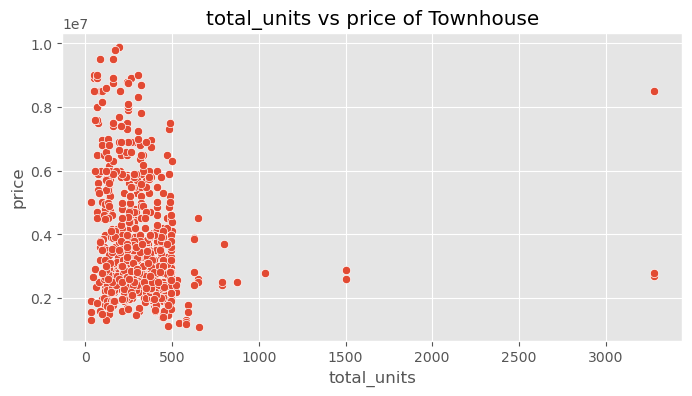

In [40]:
# Room with large total_units
# Plot boxplot for total_units vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='total_units', y='price', data=train_df[(train_df['property_type'] == 'Townhouse')])
plt.title('total_units vs price of Townhouse');

In [41]:
train_df[(train_df['property_type'] == 'Townhouse') & (train_df['total_units'] > 3000)]
# As we have research, this village has 3,280 units which is correct

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
561,10932102,Samut Prakan,Mueang Samut Prakan,Phraek Sa Mai,Praksa-Tamru Road,Townhouse,3280.0,4.0,2.0,100,...,0,None,NaN,1.0,2,0,None,"[Car Park, 24 hours security]",2700000,NaN
8803,10826559,Samut Prakan,Mueang Samut Prakan,Phraek Sa Mai,Praksa-Tamru Road,Townhouse,3280.0,3.0,2.0,86,...,0,None,NaN,1.0,2,0,None,"[Car Park, 24 hours security]",2790000,NaN
13521,10965425,Samut Prakan,Mueang Samut Prakan,Phraek Sa Mai,Praksa-Tamru Road,Townhouse,3280.0,4.0,4.0,300,...,0,None,NaN,1.0,2,0,None,"[Car Park, 24 hours security]",8500000,NaN


#### fixing floor levels

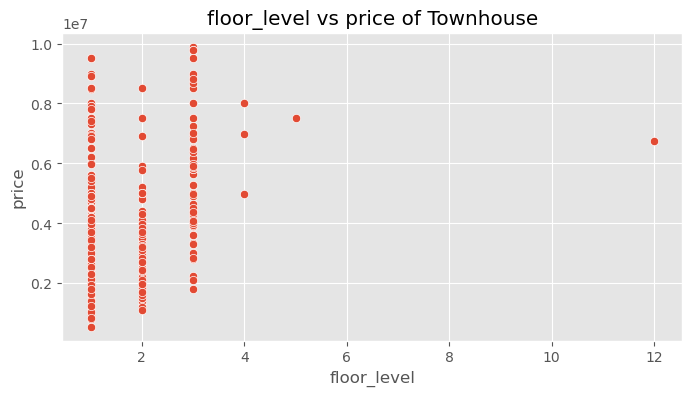

In [43]:
# Townhouse with large amount of floor level
# Plot boxplot for floor_level vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='floor_level', y='price', data=train_df[(train_df['property_type'] == 'Townhouse')])
plt.title('floor_level vs price of Townhouse');

In [44]:
train_df[(train_df['property_type'] == 'Townhouse') & (train_df['floor_level']>5)]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
11745,8908727,Bangkok,Bueng Kum,Nuan Chan,Klong Lamcheak Road,Townhouse,376.0,3.0,3.0,195,...,0,None,20.0,10.0,18,2011,None,"[Clubhouse, CCTV, Fitness corner, 24 hours sec...",6750000,NaN


In [45]:
# Townhouse with 12 floor levels, impute from other rooms with same address
train_df[(train_df['address'] == 'Klong Lamcheak Road')&(train_df['property_type'] == 'Townhouse')][['bedrooms','baths','floor_level','price']]

,bedrooms,baths,floor_level,price
1285,3.0,3.0,NaN,6950000
2293,3.0,4.0,NaN,5800000
11745,3.0,3.0,12.0,6750000


In [46]:
# From research we found that townhouses in this area with this amount of bedrooms, baths and price have 3 floors.
# replace floor level to 3
train_df.loc[1285,'floor_level'] = 3
train_df.loc[2293,'floor_level'] = 3
train_df.loc[11745,'floor_level'] = 3

#### exploring land area	

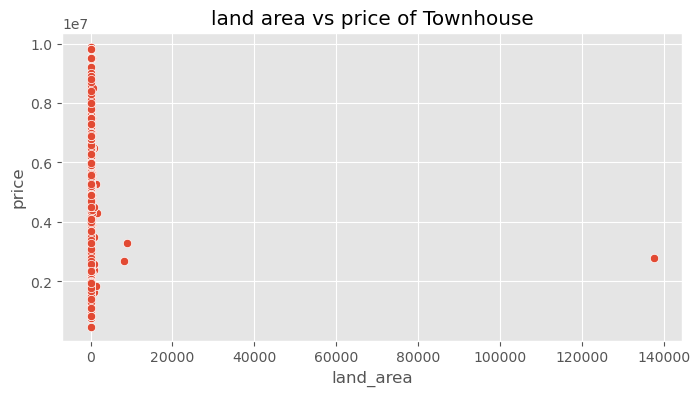

In [48]:
# Townhouse with too large land area
# Plot boxplot for floor_level vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='land_area', y='price', data=train_df[(train_df['property_type'] == 'Townhouse')])
plt.title('land area vs price of Townhouse');

In [49]:
train_df[(train_df['property_type'] == 'Townhouse') & (train_df['land_area']>7000)]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
5900,10829277,Nonthaburi,Pak Kret,Bang Phut,Bang Phut,Townhouse,NaN,3.0,3.0,90,...,0,None,8.0,8.0,8,0,None,[Covered car park],3290000,NaN
9551,10530738,Nonthaburi,Pak Kret,Tha It,Tha It,Townhouse,NaN,2.0,2.0,64,...,0,None,NaN,2.0,2,0,None,[],2800000,NaN
9591,10995315,Nonthaburi,Pak Kret,Ban Mai,Soi Tiwanon-Pak Kret 34,Townhouse,113.0,3.0,2.0,110,...,0,None,7.0,9.0,3,2015,None,"[Community Garden, CCTV, Jogging track, 24 hou...",2690000,NaN


In [50]:
# Townhouse with same address 'Bang Phut'
train_df[(train_df['address'] == 'Bang Phut')&(train_df['property_type'] == 'Townhouse')]\
[['total_units','bedrooms','baths','floor_area','land_area','floor_level','price']]
# We decide to drop the row
train_df = train_df[train_df.index != 5900]

In [51]:
# Townhouse with same address 'Soi Tiwanon-Pak Kret 34'
train_df[(train_df['address'] == 'Soi Tiwanon-Pak Kret 34')&(train_df['property_type'] == 'Townhouse')][['total_units','bedrooms','baths','floor_area','land_area','floor_level','price']]

,total_units,bedrooms,baths,floor_area,land_area,floor_level,price
544,113.0,3.0,2.0,110,72.0,NaN,2300000
6985,113.0,3.0,2.0,110,68.0,NaN,2230000
9591,113.0,3.0,2.0,110,8072.0,NaN,2690000


In [52]:
# We assume that it was typo mistake with 80.72 real number.
train_df.loc[9591, 'land_area'] = 80.72

In [53]:
# Townhouse with 137664 land area, impute from other area with same address 'Tha It'
train_df[(train_df['address'] == 'Tha It')&(train_df['property_type'] == 'Townhouse')][['total_units','bedrooms','baths','floor_area','land_area','floor_level','price']]

,total_units,bedrooms,baths,floor_area,land_area,floor_level,price
1765,NaN,3.0,2.0,72,72.0,NaN,3300000
1924,NaN,3.0,2.0,100,72.0,NaN,2390000
3207,NaN,3.0,2.0,95,72.0,1.0,2590000
3625,NaN,3.0,2.0,130,72.0,NaN,2690000
5788,NaN,3.0,2.0,142,144.0,NaN,4000000
9551,NaN,2.0,2.0,64,137664.0,NaN,2800000
13078,NaN,3.0,2.0,120,72.0,NaN,2590000


In [54]:
# find average land area for this address with price under 2,800,000
train_df[(train_df['address'] == 'Tha It') &(train_df['property_type'] == 'Townhouse')& (train_df['price'] < 2800000)]['land_area'].mean().round()

72.0

In [55]:
# set average land area for this address
train_df.loc[9551, 'land_area'] = 72

### Detached House

In [57]:
train_df[train_df['property_type'] == 'Detached House'].describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price,price_sqm
count,2.169000e+03,748.000000,2158.000000,2161.000000,2169.000000,324.000000,2114.000000,2169.000000,2169.000000,2169.000000,1176.000000,1973.000000,2169.000000,2169.000000,2.169000e+03,0.0
mean,1.067616e+07,404.332888,3.341520,2.684405,186.249885,1.725309,363.303690,13.781923,100.575619,0.086215,9.887755,5.220476,4.872291,382.983402,5.578554e+06,NaN
std,6.689177e+05,342.266108,0.780291,0.806445,74.164823,1.626553,3614.738823,0.122687,0.136232,0.356074,6.175944,3.574837,3.915483,791.076644,1.954258e+06,NaN
min,2.610467e+06,38.000000,1.000000,0.000000,20.000000,1.000000,20.000000,13.517062,100.273931,0.000000,1.000000,1.000000,1.000000,0.000000,4.990000e+05,NaN
25%,1.066868e+07,193.750000,3.000000,2.000000,141.000000,1.000000,196.000000,13.662937,100.451139,0.000000,5.000000,2.000000,2.000000,0.000000,3.990000e+06,NaN
50%,1.088128e+07,309.000000,3.000000,3.000000,171.000000,2.000000,216.000000,13.815482,100.609453,0.000000,9.000000,5.000000,4.000000,0.000000,5.490000e+06,NaN
75%,1.098251e+07,429.500000,4.000000,3.000000,210.000000,2.000000,260.000000,13.889917,100.695813,0.000000,15.000000,7.000000,6.000000,0.000000,6.950000e+06,NaN
max,1.104790e+07,3036.000000,10.000000,9.000000,766.000000,24.000000,121600.000000,14.022246,100.905485,3.000000,20.000000,20.000000,20.000000,2022.000000,9.990000e+06,NaN


#### exploring total units

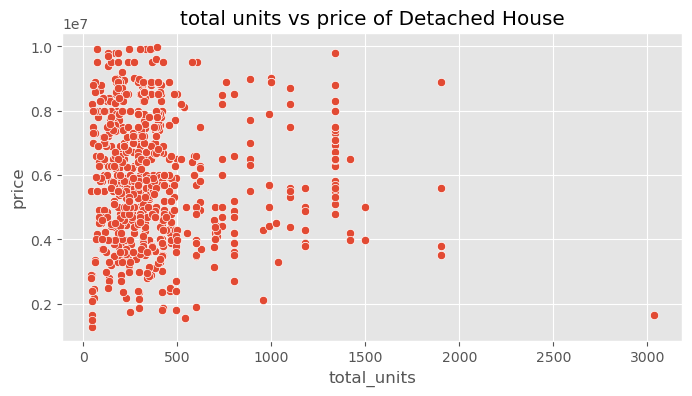

In [59]:
# Room with too large floor level
# Plot boxplot for floor_level vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='total_units', y='price', data=train_df[(train_df['property_type'] == 'Detached House')])
plt.title('total units vs price of Detached House');

In [60]:
# explore outliner
train_df[(train_df['property_type'] == 'Detached House') & (train_df['total_units']>3000)]
# As we have research, this village has 3,036 units which is correct

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
13621,10870538,Bangkok,Nong Chok,Krathum Rai,Soi Yoo Wittaya 18,Detached House,3036.0,2.0,2.0,120,...,0,None,NaN,3.0,2,0,None,[Children's Playground],1650000,NaN


#### exploring floor area

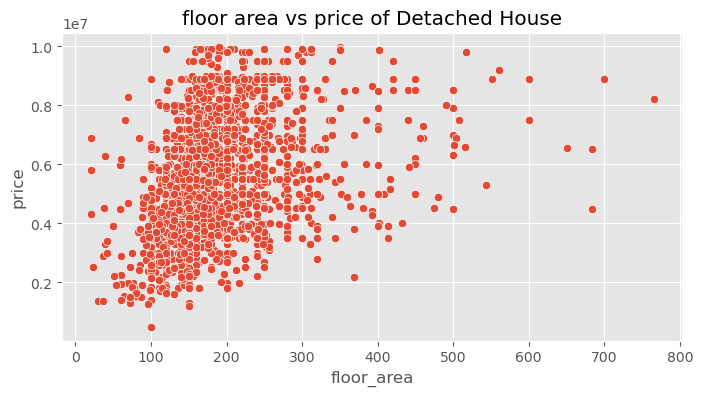

In [62]:
# Room with large amount of floor area
# Plot boxplot for floor_level vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='floor_area', y='price', data=train_df[(train_df['property_type'] == 'Detached House')])
plt.title('floor area vs price of Detached House');

#### fixing floor levels

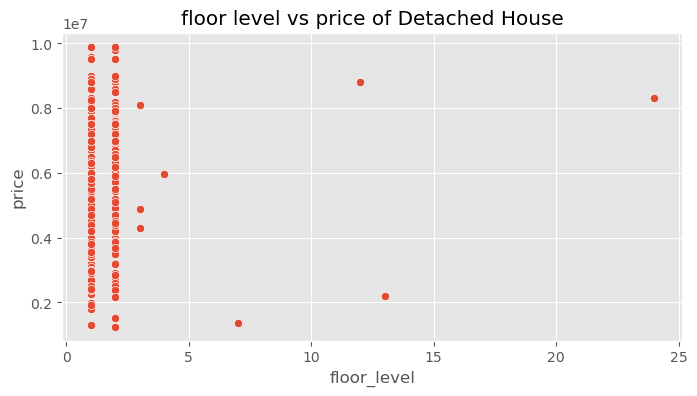

In [64]:
# Plot boxplot for floor_level vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='floor_level', y='price', data=train_df[(train_df['property_type'] == 'Detached House')])
plt.title('floor level vs price of Detached House');

In [65]:
# Room with large amount of floor area (more than 10 levels)
train_df[(train_df['property_type'] == 'Detached House') & (train_df['floor_level']>10)]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
10889,11032181,Nonthaburi,Mueang Nonthaburi,Tha Sai,Soi Samakkhi 60/2,Detached House,NaN,1.0,1.0,51,...,0,None,20.0,6.0,8,0,None,[Car Park],2200000,NaN
11030,9800284,Nonthaburi,Pak Kret,Khlong Khoi,Chaiya Phruk Road,Detached House,406.0,3.0,3.0,197,...,0,None,NaN,1.0,1,2007,None,"[Car Park, Clubhouse, Community Garden, CCTV, ...",8800000,NaN
11989,9014167,Bangkok,Khlong Sam Wa,Sam Wa Tawan Tok,Panya Inthra Road,Detached House,210.0,4.0,4.0,233,...,0,None,1.0,NaN,1,0,None,"[Car Park, Community Garden, CCTV, Fitness cor...",8300000,NaN


In [66]:
# find floor_level for this province ('Nonthaburi') with 1 bedroom and 1 bath
train_df[(train_df['property_type'] == 'Detached House') &(train_df['province']== 'Nonthaburi')& (train_df['bedrooms']== 1)]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
8341,10847559,Nonthaburi,Bang Kruai,Maha Sawat,130/28 ถนนบางกรวย-กรุงนนท์,Detached House,NaN,1.0,1.0,53,...,0,None,NaN,5.0,4,0,None,[],1900000,NaN
10889,11032181,Nonthaburi,Mueang Nonthaburi,Tha Sai,Soi Samakkhi 60/2,Detached House,NaN,1.0,1.0,51,...,0,None,20.0,6.0,8,0,None,[Car Park],2200000,NaN
12677,10759632,Nonthaburi,Bang Bua Thong,Bang Rak Phatthana,Bang Rak Pattana,Detached House,NaN,1.0,1.0,90,...,0,None,5.0,2.0,3,0,None,[],3450000,NaN


In [67]:
# replace floor level to 1 (as same as house with id 8341)
train_df.loc[10889,'floor_level'] = 1

In [68]:
# find floor_level for this address 'Chaiya Phruk Road'
train_df[(train_df['property_type'] == 'Detached House') & (train_df['address']== 'Chaiya Phruk Road')]
# It can be assumed that these houses are in the same village

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
4175,10272848,Nonthaburi,Pak Kret,Khlong Khoi,Chaiya Phruk Road,Detached House,406.0,3.0,3.0,140,...,0,None,NaN,1.0,1,2007,None,"[Car Park, Clubhouse, Community Garden, CCTV, ...",7550000,NaN
5121,10992760,Nonthaburi,Pak Kret,Khlong Khoi,Chaiya Phruk Road,Detached House,406.0,3.0,3.0,135,...,0,None,NaN,1.0,1,2007,None,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6700000,NaN
5127,10862071,Nonthaburi,Pak Kret,Khlong Khoi,Chaiya Phruk Road,Detached House,406.0,3.0,3.0,197,...,0,None,NaN,1.0,1,2007,None,"[Car Park, Clubhouse, Community Garden, CCTV, ...",8590000,NaN
11030,9800284,Nonthaburi,Pak Kret,Khlong Khoi,Chaiya Phruk Road,Detached House,406.0,3.0,3.0,197,...,0,None,NaN,1.0,1,2007,None,"[Car Park, Clubhouse, Community Garden, CCTV, ...",8800000,NaN
11940,10937161,Nonthaburi,Pak Kret,Khlong Khoi,Chaiya Phruk Road,Detached House,406.0,3.0,3.0,197,...,0,None,NaN,1.0,1,2007,None,"[Car Park, Clubhouse, Community Garden, CCTV, ...",8590000,NaN


In [69]:
# From research we find that this village (Pleno Chaiya Phruk) have only one house type with 2 floor_level
# replace floor level to 2
train_df.loc[4175,'floor_level'] = 2
train_df.loc[5127,'floor_level'] = 2
train_df.loc[11030,'floor_level'] = 2
train_df.loc[11940,'floor_level'] = 2

In [70]:
# find floor_level for this address ('Sam Wa Tawan Tok')
train_df[(train_df['property_type'] == 'Detached House') & (train_df['address']== 'Panya Inthra Road')]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
11989,9014167,Bangkok,Khlong Sam Wa,Sam Wa Tawan Tok,Panya Inthra Road,Detached House,210.0,4.0,4.0,233,...,0,None,1.0,NaN,1,0,None,"[Car Park, Community Garden, CCTV, Fitness cor...",8300000,NaN


In [71]:
# From research we find that this village (Habitia Motive) have only one house type with 2 floor_level
# replace floor level to 2
train_df.loc[11989,'floor_level'] = 2

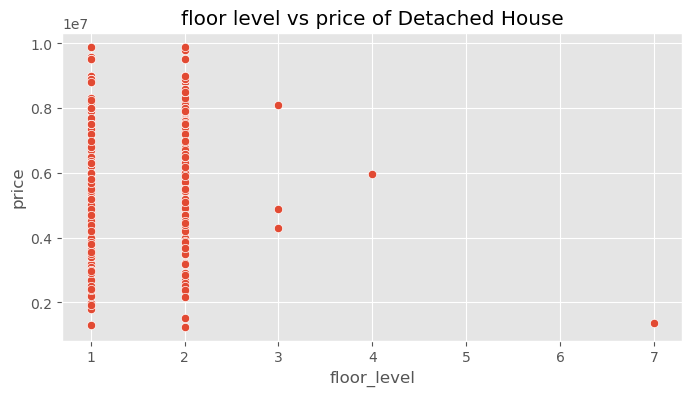

In [72]:
# Plot boxplot for floor_level vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='floor_level', y='price', data=train_df[(train_df['property_type'] == 'Detached House')])
plt.title('floor level vs price of Detached House');

#### exploring land area

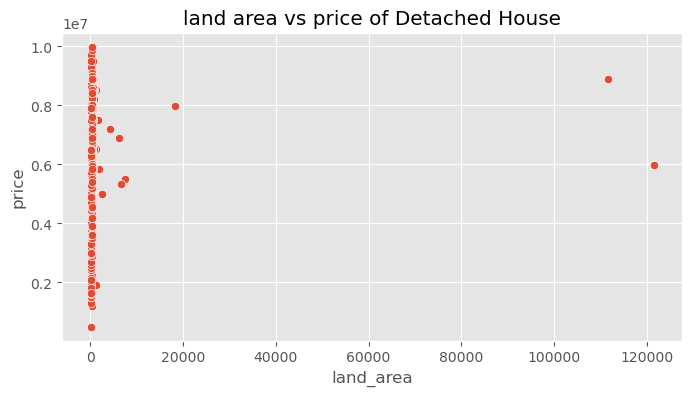

In [74]:
# Plot boxplot for land_area vs price
plt.figure(figsize=(8,4))
sns.scatterplot(x='land_area', y='price', data=train_df[(train_df['property_type'] == 'Detached House')])
plt.title('land area vs price of Detached House');

In [75]:
# explore outliner
train_df[(train_df['property_type'] == 'Detached House') & (train_df['land_area']>100_000)]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
5463,11030917,Nonthaburi,Bang Yai,Bang Len,Bang Len,Detached House,NaN,3.0,3.0,222,...,0,None,NaN,8.0,8,0,None,[24 hours security],5990000,NaN
9067,11014713,Samut Prakan,Mueang Samut Prakan,Bang Mueang Mai,233/7 Srinakarin Road,Detached House,1000.0,3.0,3.0,276,...,0,None,8.0,3.0,7,0,None,"[Clubhouse, Community Garden, CCTV, Fitness co...",8900000,NaN


In [76]:
# find floor_level for this address 'Bang Len'
train_df[(train_df['property_type'] == 'Detached House') & (train_df['address']== 'Bang Len')][['bedrooms','baths','total_units','floor_area','floor_level','land_area']]

,bedrooms,baths,total_units,floor_area,floor_level,land_area
4054,4.0,4.0,NaN,201,NaN,200.0
5463,3.0,3.0,NaN,222,NaN,121600.0
6043,3.0,2.0,NaN,190,NaN,244.0
8634,4.0,3.0,NaN,200,NaN,268.0
11692,4.0,3.0,NaN,200,NaN,212.0
11884,3.0,3.0,NaN,222,NaN,304.0
11972,4.0,4.0,NaN,350,NaN,516.0


In [77]:
# replace land area with 304 as there are the same number of bedrooms, baths and floor_area
train_df.loc[5463,'land_area'] = 304

In [78]:
# find floor_level for this address '233/7 Srinakarin Road'
train_df[(train_df['property_type'] == 'Detached House') & (train_df['address']== '233/7 Srinakarin Road')]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,price_sqm
3470,11022364,Samut Prakan,Mueang Samut Prakan,Bang Mueang Mai,233/7 Srinakarin Road,Detached House,1000.0,3.0,3.0,187,...,0,None,8.0,3.0,7,0,None,"[Clubhouse, Community Garden, CCTV, Fitness co...",9000000,NaN
4746,11002365,Samut Prakan,Mueang Samut Prakan,Bang Mueang Mai,233/7 Srinakarin Road,Detached House,1000.0,3.0,3.0,551,...,0,None,8.0,3.0,7,0,None,"[Clubhouse, Community Garden, CCTV, Fitness co...",8900000,NaN
9067,11014713,Samut Prakan,Mueang Samut Prakan,Bang Mueang Mai,233/7 Srinakarin Road,Detached House,1000.0,3.0,3.0,276,...,0,None,8.0,3.0,7,0,None,"[Clubhouse, Community Garden, CCTV, Fitness co...",8900000,NaN


In [79]:
# find average floor_level for this address
train_df[(train_df['property_type'] == 'Detached House') & (train_df['address']== '233/7 Srinakarin Road') & (train_df['land_area'] != 111680)]['land_area'].mean().round()

286.0

In [80]:
# replace land area with 286 
train_df.loc[9067,'land_area'] = 286

# Modelling

In [82]:
train_df.columns

Index(['id', 'province', 'district', 'subdistrict', 'address', 'property_type',
       'total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'land_area', 'latitude', 'longitude', 'nearby_stations',
       'nearby_station_distance', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'year_built', 'month_built', 'facilities', 'price',
       'price_sqm'],
      dtype='object')

In [83]:
train_df.shape

(14097, 24)

In [84]:
def replace_bedrooms(df):
    if not np.isnan(df['bedrooms']):
        return df['bedrooms']
    if df['property_type'] == 'Condo':
        return 1
    if df['property_type'] == 'Townhouse':
        return 3
    if df['property_type'] == 'Detached House':
        return 3
train_df['bedrooms'] = train_df.apply(replace_bedrooms,axis=1)


def replace_baths(df):
    if not np.isnan(df['baths']):
        return df['baths']
    if df['property_type'] == 'Condo':
        return 1
    if df['property_type'] == 'Townhouse':
        return 3
    if df['property_type'] == 'Detached House':
        return 3
train_df['baths'] = train_df.apply(replace_baths,axis=1)

def replace_floor(df):
    if not np.isnan(df['floor_level']):
        return df['floor_level']
    if df['property_type'] == 'Condo':
        return 18
    if df['property_type'] == 'Townhouse':
        return 2
    if df['property_type'] == 'Detached House':
        return 2
train_df['floor_level'] = train_df.apply(replace_floor,axis=1)

In [85]:
X = pd.get_dummies(train_df, columns=['province','property_type','district','nearby_stations'], drop_first=True)
y = train_df['price']

# exclude unneed column
used_features = ['bedrooms','baths','floor_level','district','latitude', 'longitude','floor_area']
features = [x for x in X.columns if x in used_features or 'property_type' in x or 'province_' in x or 'district_' in x or 'nearby_stations' in x]
y = X[(~X['bedrooms'].isnull()) & (~X['baths'].isnull())]['price']
X = X[(~X['bedrooms'].isnull()) & (~X['baths'].isnull())][features]

X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.8, random_state=42)


In [86]:
model = LinearRegression()
model.fit(X_train, y_train)


pred_train = model.predict(X_train)
pred_dev = model.predict(X_dev)

print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", root_mean_squared_error(y_train, pred_train))
print("RMSE of test  :", root_mean_squared_error(y_dev, pred_dev))

R2 Score of train : 0.6447209795927682
R2 Score of dev   : 0.6452572452856055

RMSE of train : 1295783.509391142
RMSE of test  : 1308448.420523611


# How to submit

- preprocess test data in the same way as train data
- after that, predict `price` and create `submission.csv`
- `submission.csv` must have 2 columns: `id` and `price`
- **NEVER** drop any row in the test data

In [88]:
# preprocessing
test_df['bedrooms'] = test_df.apply(replace_bedrooms,axis=1)
test_df['baths'] = test_df.apply(replace_baths,axis=1)
test_df['floor_level'] = test_df.apply(replace_floor,axis=1)

X_test = pd.get_dummies(test_df, columns=['province','property_type','district','nearby_stations'], drop_first=True)
used_features = ['bedrooms','baths','floor_level','district','latitude', 'longitude','floor_area']
features = [x for x in X.columns if x in used_features or 'property_type' in x or 'province_' in x or 'district_' in x or 'nearby_stations' in x]
X_test = X_test[features]


In [89]:
# prediction
pred_test = model.predict(X_test)
pred_test[:10]

array([5516181.88567662, 5442943.08742836, 4901192.82974643,
       5001665.97930348, 2948942.39430404, 5566646.66795442,
       3212170.437507  , 4205895.10524359, 3476507.75081086,
       4265613.50134358])

In [90]:
# save as csv file
test_df['price'] = pred_test
test_df[['id','price']].to_csv('../data/submission.csv', index=False)